<img src="./assets/ga-logo.png" style="float: left; margin: 20px; height: 55px">

# Lab: Simple Linear Regression with Sacramento Real Estate Data - Sample Solution

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import DummyClassifier to calculate the baseline (null) model
from sklearn.dummy import DummyClassifier

# Import linear regression
from sklearn.linear_model import LinearRegression

In [2]:
sacramento = pd.read_csv('./sacramento_real_estate_transactions.csv', sep = ',' )

In [3]:
sacramento.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [4]:
# Check the dtypes.
sacramento.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [8]:
print(sacramento['zip'])

0      95838
1      95823
2      95815
3      95815
4      95824
       ...  
980    95829
981    95823
982    95610
983    95758
984    95762
Name: zip, Length: 985, dtype: int64


In [9]:
# Zip code works better as a string object (categorical) so we will have to convert it.
sacramento['zip'] = sacramento['zip'].astype(str)

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

In [16]:
# Check out the summary statistics:
sacramento.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [20]:
# Check out the cities. Most cities have very few observations.
sacramento['city'].value_counts().sort_values(ascending=True)

city
PENRYN               1
MEADOW VISTA         1
GREENWOOD            1
MATHER               1
COOL                 1
DIAMOND SPRINGS      1
SHINGLE SPRINGS      1
FORESTHILL           1
GARDEN VALLEY        1
SLOUGHHOUSE          1
WALNUT GROVE         1
EL DORADO            2
LOOMIS               2
POLLOCK PINES        3
WEST SACRAMENTO      3
RANCHO MURIETA       3
GRANITE BAY          3
GOLD RIVER           4
ELVERTA              4
WILTON               5
AUBURN               5
CAMERON PARK         9
FAIR OAKS            9
PLACERVILLE         10
ORANGEVALE          11
RIO LINDA           13
FOLSOM              17
ROCKLIN             17
CARMICHAEL          20
NORTH HIGHLANDS     21
GALT                21
EL DORADO HILLS     23
RANCHO CORDOVA      28
ANTELOPE            33
CITRUS HEIGHTS      35
ROSEVILLE           48
LINCOLN             72
ELK GROVE          114
SACRAMENTO         439
Name: count, dtype: int64

In [23]:
# What could explain the houses with 0 bedrooms?
sacramento['beds'].value_counts().sort_values(ascending=True)

beds
8      1
6      3
1     10
5     59
0    108
2    133
4    258
3    413
Name: count, dtype: int64

In [24]:
sacramento[sacramento['beds']==0]


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [28]:
# What about the houses that are less than 0 dollars?
sacramento[sacramento['price']<0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [29]:
# And the houses with negative square footage?
sacramento[sacramento['sq__ft']<0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [10]:
# Let's check if any other values are labeled incorrectly.
sacramento.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [11]:
# It looks like only one row is mislabeled, so we'll just drop that row.
sacramento.drop(703)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

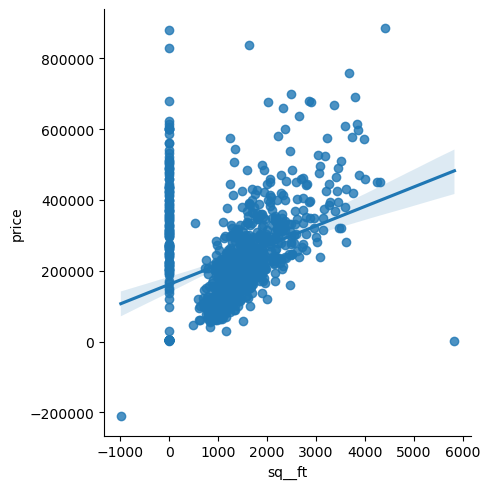

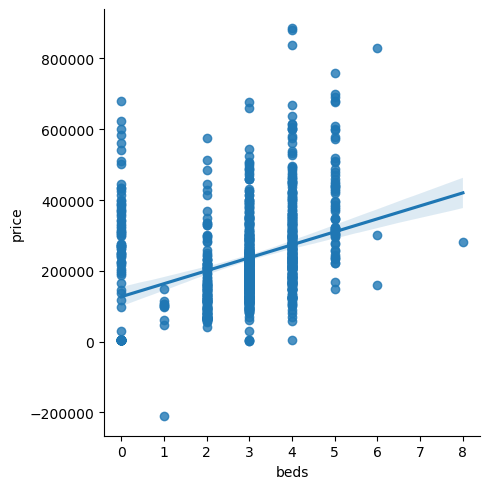

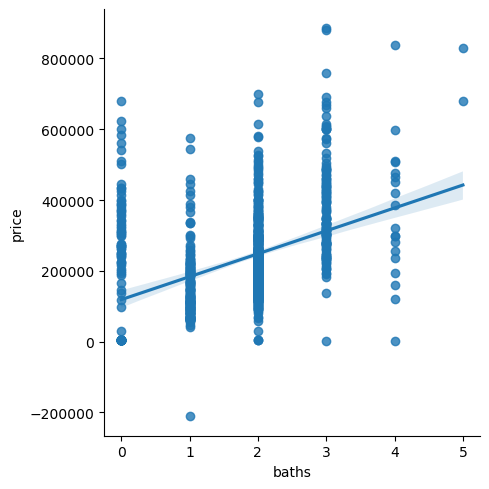

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.lmplot(x='sq__ft', y='price', data=sacramento)
plt.show()
sns.lmplot(x='beds', y='price', data=sacramento)
plt.show()
sns.lmplot(x='baths', y='price', data=sacramento)
plt.show()

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [13]:
# Correlation with price
sacramento.select_dtypes(include='number').corr()['price']


beds         0.344752
baths        0.416718
sq__ft       0.339628
price        1.000000
latitude     0.100806
longitude   -0.094262
Name: price, dtype: float64

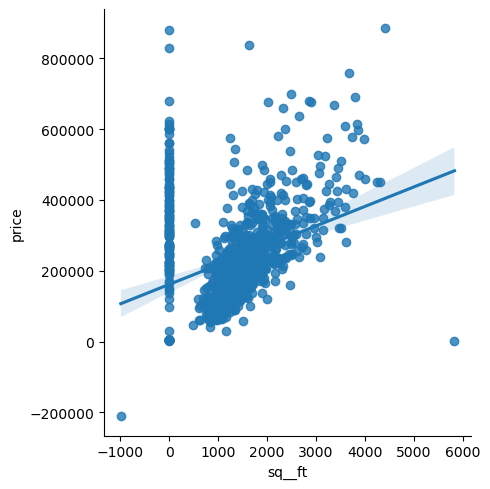

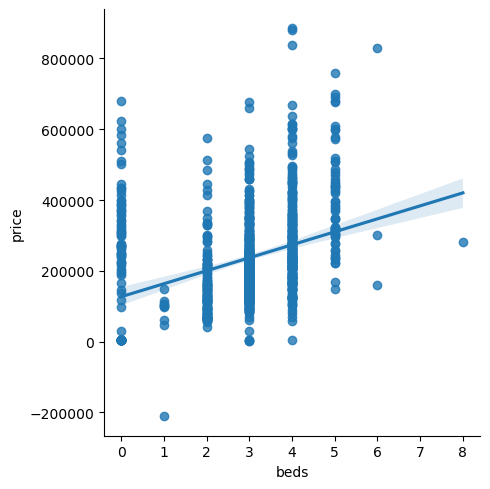

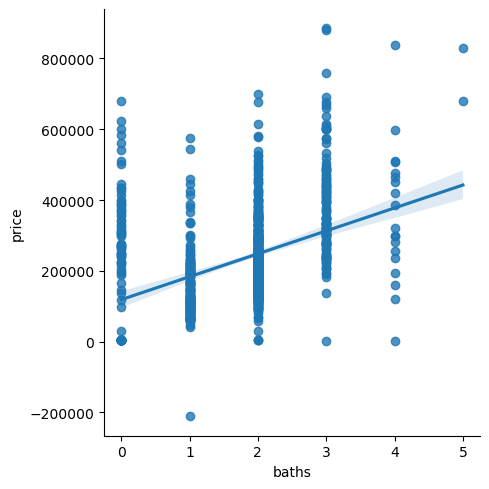

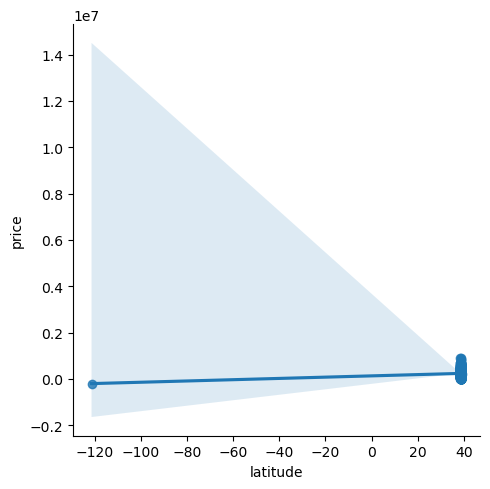

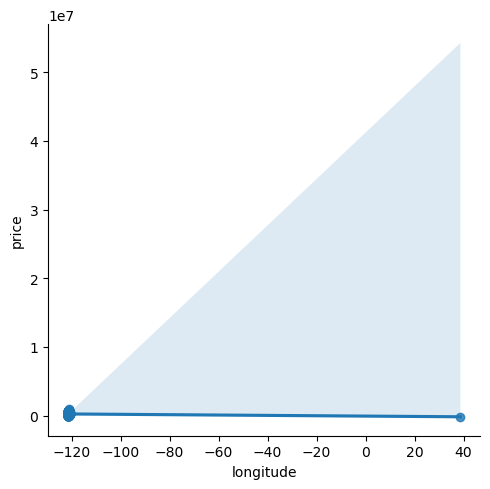

In [14]:
# We will look for the tightest linear pattern (points closely following a line).
sns.lmplot(x='sq__ft', y='price', data=sacramento)
sns.lmplot(x='beds', y='price', data=sacramento)
sns.lmplot(x='baths', y='price', data=sacramento)
sns.lmplot(x='latitude', y='price', data=sacramento)
sns.lmplot(x='longitude', y='price', data=sacramento)

In [16]:
# So, the best predictor for y is sq__ft

### 5. Build a Linear Regression model that will take in  `y` and `X`, and return the intercept and slope coefficients.. 

`y` is the target variable and `X` is the predictor variable.

- **Report the slope and intercept.**

In [17]:
X = sacramento[['sq__ft']]
y = sacramento['price']

In [18]:
# Create the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)


LinearRegression()

In [19]:
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")


Intercept: 161272.75277922256
Slope: 55.17721240500747


### 6. Interpret the intercept. Interpret the slope.

In [20]:
# The result of this intercept mean if a house had 0 square feet, the model predicts the price would be $161,272.75.
# The result of slope mean for every extra 1 square foot of house size, the predicted price increases by $55.18 on average, assuming all else is constant.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [21]:
# Prediction example
# Using the model we fitted earlier
new_sq_ft = 2500
predicted_price = intercept + slope * new_sq_ft
print(f"Predicted price: ${predicted_price:.2f}")

# The model predicts that a 2,500 sq ft house would cost approximately $298,212.50.
# This is prediction because we are estimating a specific price for a new house.

Predicted price: $299215.78


In [22]:
# Inference is about understanding the relationship between X and Y — the effect of the predictor on the outcome.
# for example if we want to know how house size affects price.
# From the model:
# Slope = 55.18
# For every additional 1 sq ft, the predicted price increases by $55.18.
# Interpretation:
# We can infer that house size has a positive impact on price. This helps understand market trends or make decisions like “bigger houses generally sell for more.”

### 8: [Bonus] Using the model you came up with in Problem 5, calculate the residuals.

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [27]:
# I will use this code to convert the type column into dummy-coded variables
dummy_type = pd.get_dummies(sacramento['type'], dtype=int)
# If I didn't use dtype=int will print the type column as True/False because the original column type is object, or we can call categorical.

In [28]:
# Display the first few rows (the header)
print(dummy_type.head())

   Condo  Multi-Family  Residential  Unkown
0      0             0            1       0
1      0             0            1       0
2      0             0            1       0
3      0             0            1       0
4      0             0            1       0


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [33]:
# Step 1: Drop the 'Unkown' column if it exists
if 'Unkown' in dummy_type.columns:
    dummy_type = dummy_type.drop('Unkown', axis=1)

# Step 3: Append (concatenate) the dummy variables to the original DataFrame
sacramento_2=pd.concat([sacramento,dummy_type],axis=1)

# Step 4: Check the result
sacramento_2.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Condo,Multi-Family,Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,0,1


### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [36]:
# Step 1: I will choose the independent variables (X) and the dependent variable(y)
# All scientists in this case should have the same dependent.
X = sacramento_2[['beds', 'baths', 'Residential','sq__ft']]
y = sacramento_2['price']

In [40]:
# step 2: fit the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [41]:
# Step 3: Display coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 63547.45353266044
Coefficients: [-1.18709183e+04  6.55060277e+04  6.69353269e+04  1.98314452e+01]


In [42]:
# Step 4: Show each variable with its coefficient
coef_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print(coef_df)

      Variable   Coefficient
0         beds -11870.918305
1        baths  65506.027659
2  Residential  66935.326933
3       sq__ft     19.831445


### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

> **Tip:** with seaborn's `sns.lmplot` you can set `x`, `y`, and even a `hue` (which will plot regression lines by category in different colors) to easily plot a regression line.

In [43]:
y_pred = model.predict(X)

In [44]:
results = pd.DataFrame({
    'True Price': y,
    'Predicted Price': y_pred
})

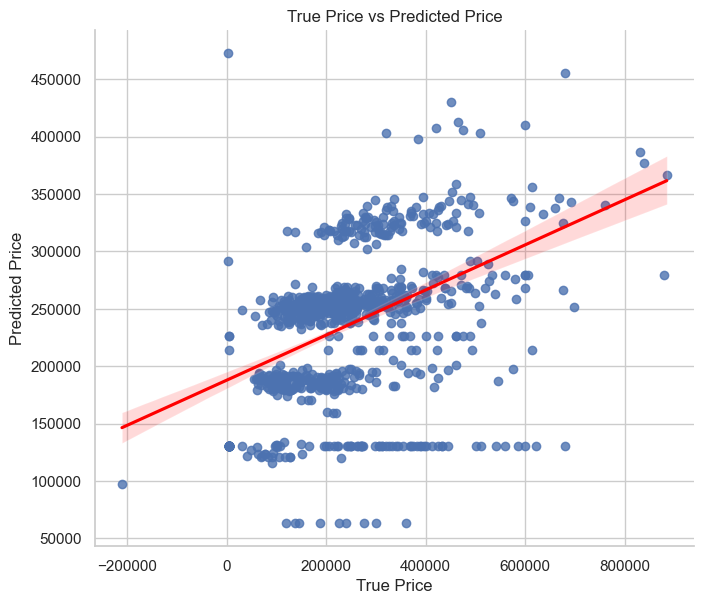

In [45]:
sns.set(style='whitegrid')

# Plot actual vs predicted
sns.lmplot(
    x='True Price', 
    y='Predicted Price',
    data=results,
    height=6,
    aspect=1.2,
    line_kws={'color': 'red'}  # regression line
)

plt.title('True Price vs Predicted Price')
plt.show()

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

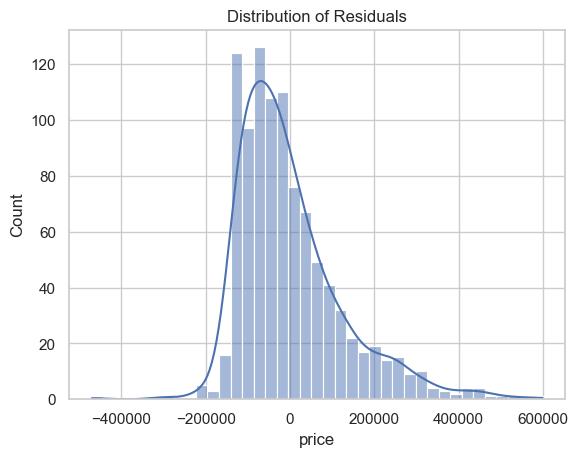

In [46]:
# Normality:  Do the Residual Errors follow a normal distribution?

# Calculate residuals
residuals = y - y_pred

# Histogram
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

# The residual histogram appears roughly bell-shaped and centered near zero, suggesting the normality assumption is reasonably met.

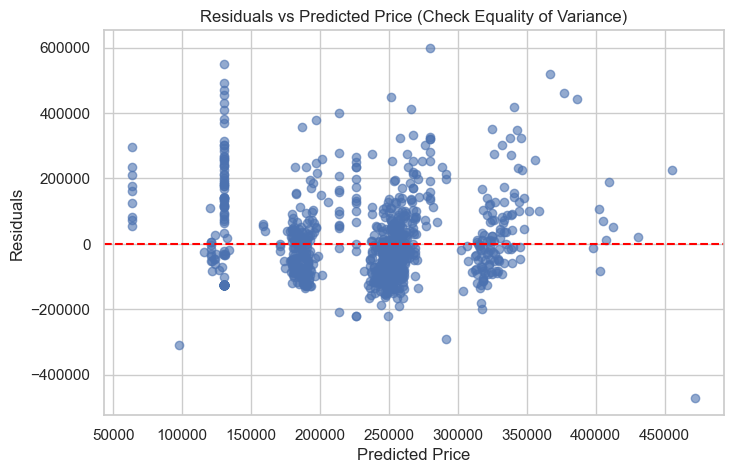

In [47]:
# Equality of variance. 
residuals = y - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Price (Check Equality of Variance)")
plt.show()
    

In [ ]:
#If points are randomly scattered around 0 with roughly equal spread → assumption is likely met. 
# If points fan out or form a pattern → heteroscedasticity exists (violation of assumption).

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

MSE, RMSE, R squared

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def regression_metrics(y_true, y_pred, return_dict=False):
    """
    Calculates common regression metrics: MSE, RMSE, R-squared.

    Parameters:
        y_true : array-like
            True target values
        y_pred : array-like
            Predicted target values
        return_dict : bool
            If True, returns metrics as a dictionary. Otherwise prints them.

    Returns:
        dict (optional)
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    if return_dict:
        return {'MSE': mse, 'RMSE': rmse, 'R²': r2}
    else:
        print(f"MSE  : {mse:.2f}")
        print(f"RMSE : {rmse:.2f}")
        print(f"R²   : {r2:.3f}")

# Assuming y and y_pred are your actual and predicted prices
regression_metrics(y, y_pred)


MSE  : 15531644786.65
RMSE : 124626.02
R²   : 0.196
